<a href="https://colab.research.google.com/github/hyeji-K/AI_example/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_%EC%8B%A4%EC%8A%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install googletrans==3.1.0a0

Found existing installation: googletrans 3.0.0
Uninstalling googletrans-3.0.0:
  Would remove:
    /usr/local/bin/translate
    /usr/local/lib/python3.10/dist-packages/googletrans-3.0.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/googletrans/*
Proceed (Y/n)? y
  Successfully uninstalled googletrans-3.0.0
  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=f2b8c27a29230c8540b7c0785eafbdbec9b0128f554896a2ab8edadc0189f55a
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans


In [4]:
from googletrans import Translator

In [5]:
def translate_kr_to_en(text):
    translator = Translator()
    result = translator.translate(text, src='ko', dest='en')
    return result.text

In [6]:
korean_text = "안녕하세요. 오늘 날씨가 좋습니다."
english_translation = translate_kr_to_en(korean_text)

print(f"한국어: {korean_text}")
print(f"영어 번역: {english_translation}")

한국어: 안녕하세요. 오늘 날씨가 좋습니다.
영어 번역: hello. The weather is nice today.


In [7]:
translator = Translator()

In [8]:
sentence = '나는 편의점에서 라면과 삼각김밥을 샀어요.'
detected_language = translator.detect(sentence)

print(detected_language)
print(detected_language.lang)

Detected(lang=ko, confidence=1)
ko


In [9]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
sentences = [
    "I love natural language processing",
    "Word embeddings are powerful",
    "Neural networks can learn word representations"
]

In [12]:
# Word2Vec
word_lists = [sentence.lower().split() for sentence in sentences]

model = Word2Vec(sentences=word_lists, vector_size=100, window=5, min_count=1, workers=4)

In [13]:
print("1. Word2Vec:")
print("'love'의 벡터 표현:", model.wv['love'][:5], "...")  # 처음 5개 요소만 출력
print("'powerful'과 가장 유사한 단어:", model.wv.most_similar('powerful', topn=3))

1. Word2Vec:
'love'의 벡터 표현: [-0.00194422 -0.00526752  0.00944711 -0.00929873  0.00450395] ...
'powerful'과 가장 유사한 단어: [('learn', 0.1459505707025528), ('language', 0.05048206448554993), ('can', 0.04157451540231705)]


In [14]:
# 워드 임베딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences)

print("\n2. 워드 임베딩 (Keras):")
print("단어 인덱스:", tokenizer.word_index)
print("패딩된 시퀀스:", padded_sequences)


2. 워드 임베딩 (Keras):
단어 인덱스: {'word': 1, 'i': 2, 'love': 3, 'natural': 4, 'language': 5, 'processing': 6, 'embeddings': 7, 'are': 8, 'powerful': 9, 'neural': 10, 'networks': 11, 'can': 12, 'learn': 13, 'representations': 14}
패딩된 시퀀스: [[ 0  2  3  4  5  6]
 [ 0  0  1  7  8  9]
 [10 11 12 13  1 14]]


In [15]:
# 3. 원-핫 인코딩
vectorizer = CountVectorizer(binary=True)
one_hot = vectorizer.fit_transform(sentences).toarray()

print("\n3. 원-핫 인코딩:")
print("특성 이름:", vectorizer.get_feature_names_out())
print("원-핫 인코딩 결과:\n", one_hot)


3. 원-핫 인코딩:
특성 이름: ['are' 'can' 'embeddings' 'language' 'learn' 'love' 'natural' 'networks'
 'neural' 'powerful' 'processing' 'representations' 'word']
원-핫 인코딩 결과:
 [[0 0 0 1 0 1 1 0 0 0 1 0 0]
 [1 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 1 0 0 1 0 0 1 1 0 0 1 1]]


In [16]:
import tensorflow as tf
from tensorflow import keras
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import nltk

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# IMDB 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
# 단어 인덱스 가져오기
word_index = keras.datasets.imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
def decode_review(text):
    return ' '.join([index_word.get(i - 3, '?') for i in text])

# 불용어 제거 함수
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = word_tokenize(text.lower())
    return [word for word in words if word.isalnum() and word not in stop_words]

# 모든 리뷰 합치기
all_words = []
for review in x_train:
    decoded = decode_review(review)
    words = remove_stopwords(decoded)
    all_words.extend(words)

# 단어 빈도 계산
word_freq = Counter(all_words)

# 상위 20개 단어 출력
print("상위 20개 단어:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

상위 20개 단어:
br: 101871
movie: 43987
film: 40128
one: 26765
like: 20272
good: 15100
would: 13485
time: 12682
even: 12650
story: 11948
really: 11734
see: 11460
well: 10644
much: 9758
could: 9407
people: 9271
bad: 9270
get: 9269
also: 9157
first: 9057


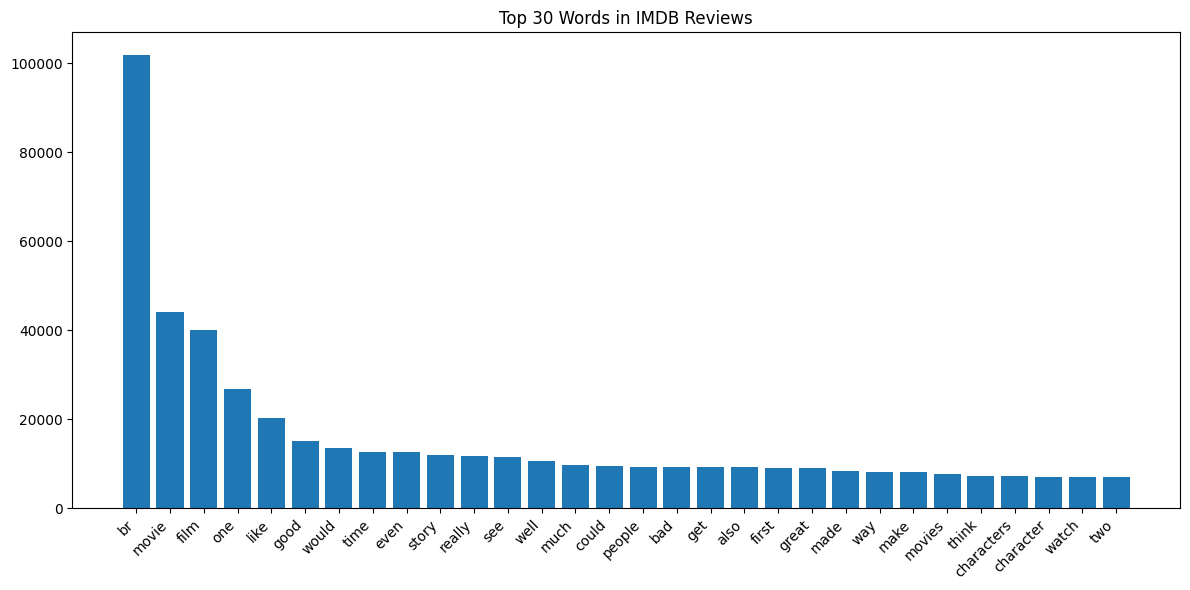

In [23]:
# 단어 빈도 그래프 생성
plt.figure(figsize=(12, 6))
words, counts = zip(*word_freq.most_common(30))
plt.bar(words, counts)
plt.title('Top 30 Words in IMDB Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# 총 단어 수와 고유 단어 수
print(f"\n총 단어 수: {len(all_words)}")
print(f"고유 단어 수: {len(set(all_words))}")


총 단어 수: 2792524
고유 단어 수: 9655
